In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [2]:
hidden_nodes = 400
epochs = 1
lr = 1e-4
samples = 60000
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.1
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(1,hidden_nodes))
W2 = np.random.normal(0,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(0,1,(1,input_size))

In [3]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    S  = np.zeros(W1.shape)
    #forward pass
    out1 = layer(X,W1,Bi1)
    z = sigm(out1)
    out2 = layer(z,W2,Bi2)
    y = sigm(out2)
    #BACKPROPAGATION
    del1 = 2*(y-X)*diff_sigm(out2)
    b2 = np.sum(del1, axis = 0).reshape(np.shape(Bi2))
    w2 = np.matmul(z.T,del1)
    zm = np.mean(z,axis = 0)
#     print(z.shape,zm.shape)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out1)
#     print(ge.shape)
    s1 = ge-np.multiply(diff_sigm(out1),np.sum(del1, axis=1).reshape(samples,1))
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    w1 = np.matmul(X.T,s1)
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2

(0, 5501149.781880232)
(1, 2869474.1037492934)
(2, 2848858.316435084)
(3, 1672870.5141031437)
(4, 1338051.413480503)
(5, 1193895.6842234829)
(6, 1139900.1740355934)
(7, 1122589.4004060128)
(8, 1077529.5543139798)
(9, 1043756.4001065387)
(10, 1018996.0394654939)
(11, 994305.3137682991)
(12, 973817.3088541075)
(13, 954144.4734200145)
(14, 936291.7103074153)
(15, 918486.556606812)
(16, 901451.5555229626)
(17, 884306.9598815696)
(18, 867812.3021517069)
(19, 851565.8825936562)
(20, 835832.3566928125)
(21, 820374.5641500561)
(22, 805367.2373637017)
(23, 790855.3196548938)
(24, 777059.5909136544)
(25, 763890.0737772372)
(26, 751210.5821669145)
(27, 738625.0591027456)
(28, 725533.7334555647)
(29, 712605.6634916706)
(30, 701254.0111719873)
(31, 690740.1794952822)
(32, 680891.7468569755)
(33, 671671.5702001218)
(34, 662879.6917399468)
(35, 654517.1862808695)
(36, 646603.5427828116)
(37, 639057.5858321261)
(38, 631795.9244485603)
(39, 624804.9634872888)
(40, 618052.0774502397)
(41, 611520.6484437

In [4]:
out1 = layer(X,W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y = sigm(out2)
y = y*255.0

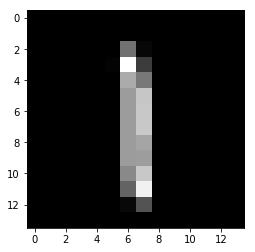

In [10]:
plt.imshow(X[14].reshape(14,14) , cmap='gray')

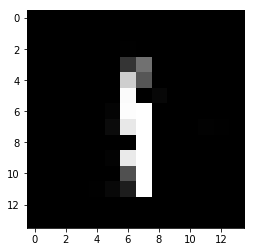

In [11]:
plt.imshow(y[14].reshape(14,14) , cmap='gray' )

In [7]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))

print(np.mean(z[1]))


(96, 400)
0.06784835059466941
